# 股利政策交易

In [2]:
import pandas as pd
import pymongo

In [127]:
path = r'C:\Users\ChastLai\Documents\Data\股利政策.xlsx'
div_cash_q = pd.read_excel(path, sheet_name='季現金股利', header=4)
div_cash_y = pd.read_excel(path, sheet_name='年現金股利', header=4)
div_share_q = pd.read_excel(path, sheet_name='季股票股利', header=4)
div_share_y = pd.read_excel(path, sheet_name='年股票股利', header=4)
date_cash_q = pd.read_excel(path, sheet_name='季除息', header=4)
date_cash_y = pd.read_excel(path, sheet_name='年除息', header=4)
date_share_q = pd.read_excel(path, sheet_name='季除權', header=4)
date_share_y = pd.read_excel(path, sheet_name='年除權', header=4)

In [12]:
client = pymongo.MongoClient()
db = client['Data']
price = pd.concat([pd.DataFrame(db[x].find({}, {'_id': 0, '日期': 1, '收盤價': 1})).set_index('日期') for x in db.list_collection_names()], axis=1)
price.columns = db.list_collection_names()
price = price.loc[price.index.dropna()]

In [47]:
from datetime import datetime, timedelta
單檔股票日期 = set(date_y[date_y['股票代號'] == 1101].T.dropna().values[2:].reshape(-1)) | set(date1_y[date1_y['股票代號'] == 1101].T.dropna().values[2:].reshape(-1))
單檔股票股利 = div_y[div_y['股票代號'] == 1101].T.dropna()
單檔股票區間 = [[x - timedelta(30), x + timedelta(30)] for x in 單檔股票日期]

In [224]:

報酬 = dict()
for k in price.columns:
    
    da_s = date_share_y[date_share_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
    di_s = div_share_y[div_share_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
    股票股利 = pd.concat([da_s, di_s], axis=1)
    股票股利.columns = ['日期', '股票股利']
    da_c = date_cash_y[date_cash_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
    di_c = div_cash_y[div_cash_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
    現金股利 = pd.concat([da_c, di_c], axis=1)
    現金股利.columns = ['日期', '現金股利']

    現金股利.dropna(inplace=True)
    現金股利 = 現金股利.groupby('日期').sum()

    股票股利.dropna(inplace=True)
    股票股利 = 股票股利.groupby('日期').sum()

    股利 = pd.concat([現金股利, 股票股利], axis=1).sort_index()
    p = price.loc[:, k].dropna()
    idx = list(set(p.index) & set(股利.index))
    分母 = price.loc[idx, k].shift(1)
    # 設定要用什麼當收入
    買進收入 = (p.shift(-20) - p.shift(20)).loc[idx].sort_index()
    買進收入 = (買進收入 + 股利.loc[idx].sum(axis=1).sort_index()) / 分母
    報酬[k] = 買進收入

In [225]:
stk_list = [
6204,
2609,
2236,
8016,
3034,
2603,
6582,
3545,
6523,
6150,
6016,
1612
]
"""
3211,
3592,
2357,
6005,
6015,
4961,
2376,
6457,
4930,
4735,
5508,
3515,
5209,
3014,
2545,
6462,
2458,
2527,
3048,
2855,
8213,
9927,
3028,
3033,
6655,
8112,
1308,
5471,
6161,
2028,
2031,
5215,
5609,
2029,
6121,
6147,
3312,
6560,
3679,
6186,
8924,
2537,
6202,
2002,
6151,
2069,
2636,
8111,
2014,
6020,
6177,
8481,
1312,
1608,
5236,
2020,
2108,
3537,
2916,
8150,
2597,
2065,
3227,
1452,
6506,
6229,
3512,
1303,
2204,
1604,
3078,
6405,
8081,
1806,
8358,
6189,
2454,
4933,
2353,
3006,
1305,
5016,
6195,
5546,
3026,
1304,
5519
]
"""

'\n1612,\n3211,\n3592,\n2357,\n6005,\n6015,\n4961,\n2376,\n6457,\n4930,\n4735,\n5508,\n3515,\n5209,\n3014,\n2545,\n6462,\n2458,\n2527,\n3048,\n2855,\n8213,\n9927,\n3028,\n3033,\n6655,\n8112,\n1308,\n5471,\n6161,\n2028,\n2031,\n5215,\n5609,\n2029,\n6121,\n6147,\n3312,\n6560,\n3679,\n6186,\n8924,\n2537,\n6202,\n2002,\n6151,\n2069,\n2636,\n8111,\n2014,\n6020,\n6177,\n8481,\n1312,\n1608,\n5236,\n2020,\n2108,\n3537,\n2916,\n8150,\n2597,\n2065,\n3227,\n1452,\n6506,\n6229,\n3512,\n1303,\n2204,\n1604,\n3078,\n6405,\n8081,\n1806,\n8358,\n6189,\n2454,\n4933,\n2353,\n3006,\n1305,\n5016,\n6195,\n5546,\n3026,\n1304,\n5519\n]\n'

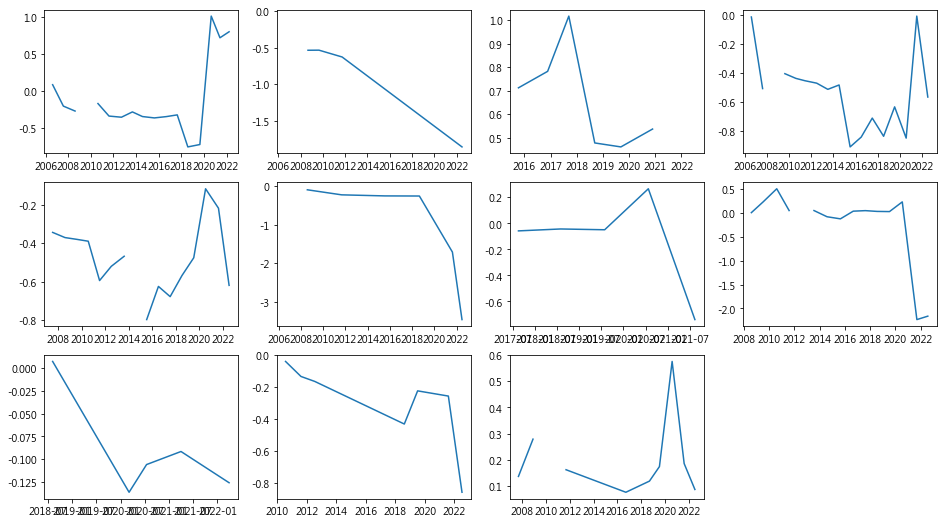

In [240]:
import matplotlib.pyplot as plt
pd.options.plotting.backend = "matplotlib"
plt.rcParams['font.family'] = ['Microsoft JhengHei'] # 中文標籤
plt.rcParams['axes.unicode_minus'] = False # 負號
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.4f}'.format
fig = plt.figure(figsize=(16, 9))
color = 0.01
f = 1
for t in stk_list:
    color += 0.05
    fig.add_subplot(3, 4, f)
    plt.plot(報酬[str(t)].cumsum())
    f += 1
plt.show()

In [234]:
'34' + '1'

'341'

6204

In [115]:
殖利率 = dict()
股利 = dict()
日期 = dict()
k = '1101'
p = price.loc[:, k].dropna()
日期[k] = set(date_y[date_y['股票代號'] == int(k)].T.dropna().values[2:].reshape(-1)) | set(date1_y[date1_y['股票代號'] == int(k)].T.dropna().values[2:].reshape(-1))
日期[k] = set(p.index) & set(日期[k])
股利[k] = div_y[div_y['股票代號'] == int(k)].T.dropna().iloc[2:]
p = p.shift(1).loc[list(日期[k])]

In [122]:
股利[k]
日期[k] = set(date_y[date_y['股票代號'] == int(k)].T.dropna().values[2:].reshape(-1)) | set(date1_y[date1_y['股票代號'] == int(k)].T.dropna().values[2:].reshape(-1))

In [137]:
股票股利 = pd.concat([date_share_y[date_share_y['股票代號'] == int(k)].T, div_share_y[div_share_y['股票代號'] == int(k)].T], axis=1, ignore_index=True)
現金股利 = pd.concat([date_cash_y[date_cash_y['股票代號'] == int(k)].T, div_cash_y[div_cash_y['股票代號'] == int(k)].T], axis=1, ignore_index=True)

In [154]:
da_s = date_share_y[date_share_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
di_s = div_share_y[div_share_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
股票股利 = pd.concat([da_s, di_s], axis=1)
da_c = date_cash_y[date_cash_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
di_c = div_cash_y[div_cash_y['股票代號'] == int(k)].T.iloc[2:].reset_index(drop=True)
現金股利 = pd.concat([da_c, di_c], axis=1)

In [155]:
現金股利.dropna(inplace=True)
現金股利.columns = ['日期', '現金股利']
現金股利.set_index('日期', inplace=True)
股票股利.dropna(inplace=True)
股票股利.columns = ['日期', '股票股利']
股票股利.set_index('日期', inplace=True)
股利 = pd.concat([現金股利, 股票股利], axis=1).sort_index()

,股票股利
日期,
1990-08-13,2.0
1991-10-16,1.4
1992-07-13,1.5
1993-06-24,1.0
1994-07-22,1.3
1995-07-19,1.2
1996-06-22,1.0
1997-07-22,1.0
1998-06-09,1.0


In [189]:
股利 = pd.concat([現金股利, 股票股利], axis=1).sort_index()
p = price.loc[:, k].dropna()
idx = list(set(p.index) & set(股利.index))

買進收入 = (p.shift(-1) - p.shift(1)).loc[idx].sort_index()
買進收入 += 股利.loc[idx].sum(axis=1).sort_index()

In [190]:
買進收入

日期
2006-08-25   -0.237841
2007-07-30    1.800000
2008-07-25   -1.000000
2009-08-17   -1.480000
2010-07-14    0.450000
2011-07-26   -1.650000
2012-07-26    1.350000
2013-07-25    0.150000
2014-07-17   -0.100000
2015-07-23    0.190000
2016-07-25    0.230000
2017-07-25   -0.050000
2018-07-26   -2.300000
2019-08-13   -1.643780
2020-08-12   -2.299021
2021-08-12    0.668119
2022-07-21   -1.901435
Name: 1101, dtype: float64

In [188]:
股利.loc[idx].sum(axis=1).sort_index()

日期
2006-08-25    1.562159
2007-07-30    1.800000
2008-07-25    2.000000
2009-08-17    1.320000
2010-07-14    1.800000
2011-07-26    2.000000
2012-07-26    1.900000
2013-07-25    1.900000
2014-07-17    2.300000
2015-07-23    2.490000
2016-07-25    1.330000
2017-07-25    1.450000
2018-07-26    2.500000
2019-08-13    4.006220
2020-08-12    3.000979
2021-08-12    3.368119
2022-07-21    1.998565
dtype: float64